In [146]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [147]:
df = pd.read_csv("loan_prediction.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [148]:
df.shape

(614, 13)

In [149]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: xlabel='Gender', ylabel='count'>

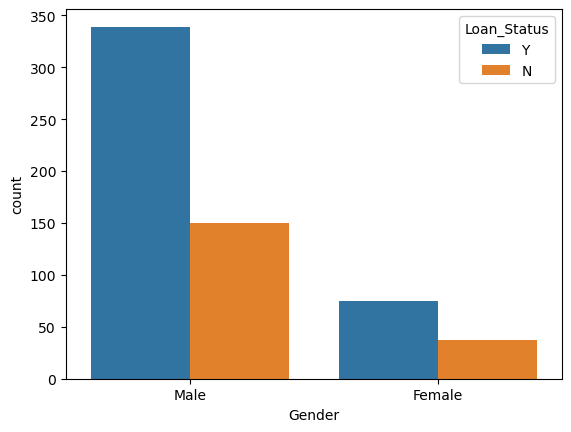

In [150]:
sns.countplot(x="Gender", hue="Loan_Status", data=df)

<Axes: xlabel='Married', ylabel='count'>

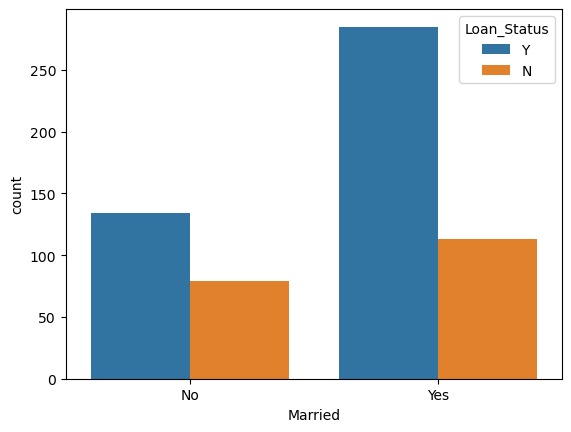

In [151]:
sns.countplot(x="Married",hue="Loan_Status",data=df)

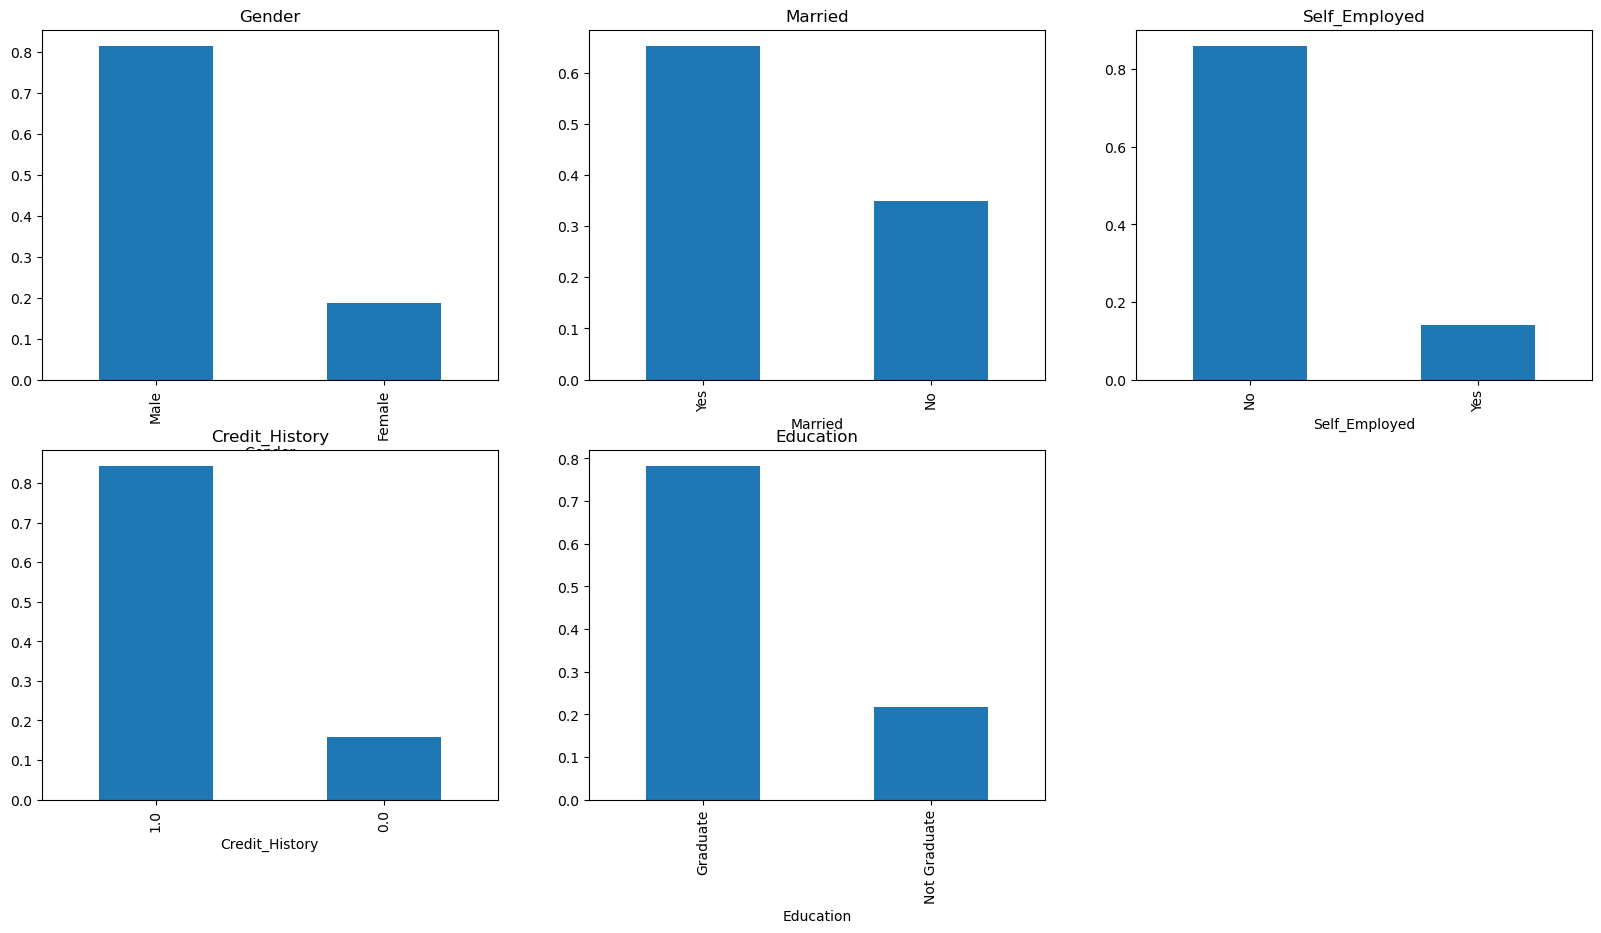

In [152]:
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

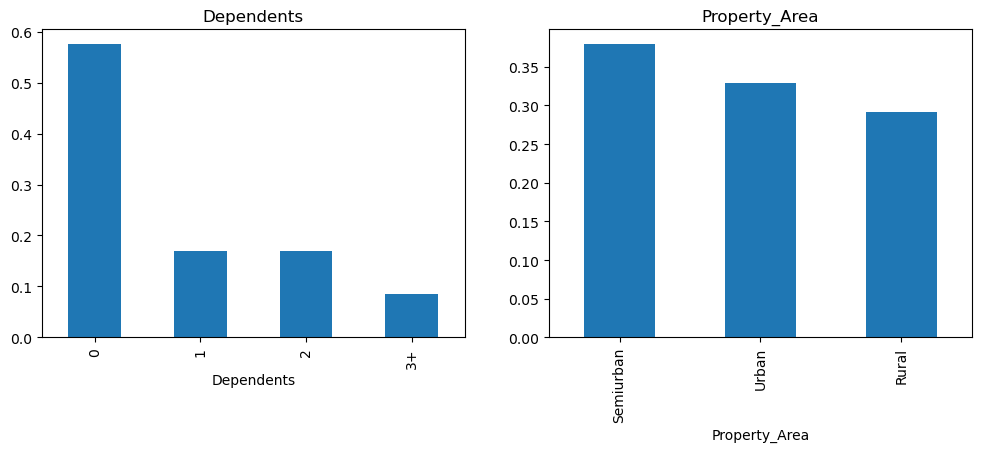

In [153]:
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

<Axes: xlabel='Loan_Status'>

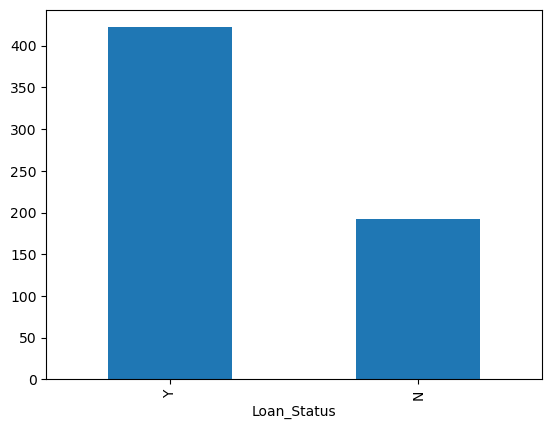

In [80]:
df['Loan_Status'].value_counts().plot.bar()

<Axes: >

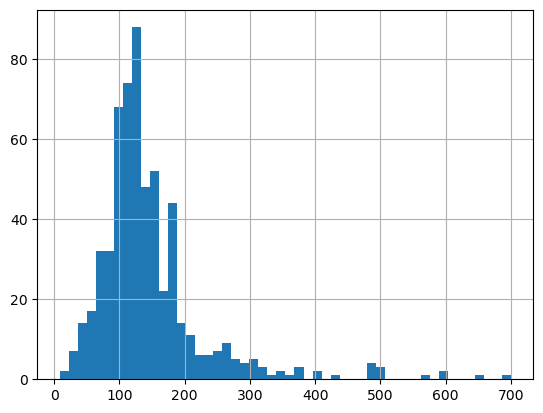

In [81]:
df['LoanAmount'].hist(bins=50)

<Axes: >

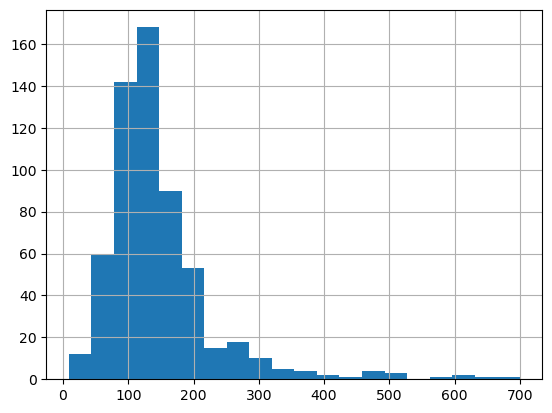

In [82]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

df['LoanAmount'].hist(bins=20)

<Axes: >

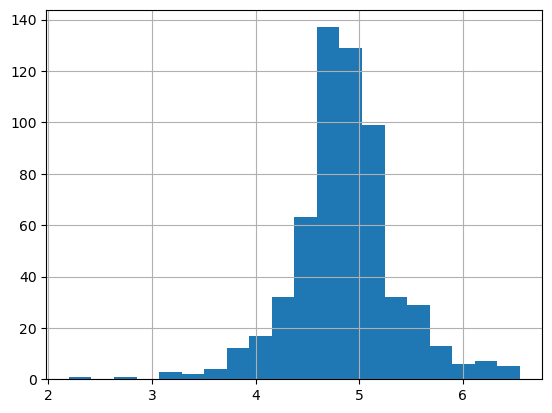

In [83]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

<Axes: title={'center': 'Loan_Amount_Term'}, xlabel='Loan_Amount_Term'>

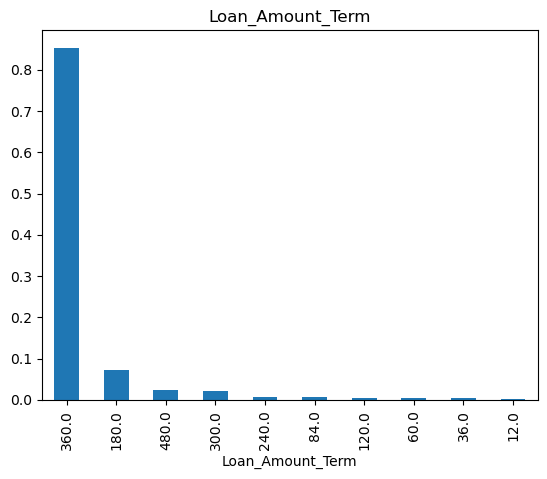

In [156]:
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')


Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


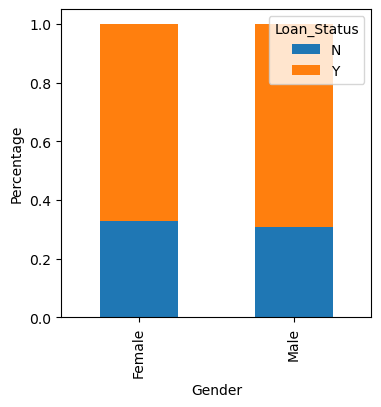

In [155]:
# df veri çerçevesindeki 'Gender' ve 'Loan_Status' sütunlarını kullanarak bir çapraz tablo oluşturuyor.
# Bu çapraz tablo, cinsiyetlerin kredi durumu dağılımını gösteriyor.
print(pd.crosstab(df['Gender'], df['Loan_Status']))

# 'Gender' değişkenine göre kredi durumu için oluşturulan çapraz tabloyu yeni bir değişkene atıyor.
Gender = pd.crosstab(df['Gender'], df['Loan_Status'])

# Her bir cinsiyet grubundaki kredi durumlarının yüzdesel dağılımını hesaplıyor.
# Daha sonra, normalleştirilmiş çapraz tabloyu yığılmış çubuk grafik olarak çiziyor.
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# X eksenini etiketliyor ve bu etiketi 'Gender' (Cinsiyet) olarak ayarlıyor.(baslik)
plt.xlabel('Gender')

# Y eksenini etiketliyor ve bu etiketi 'Percentage' (Yüzde) olarak ayarlıyor.
p = plt.ylabel('Percentage')


Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


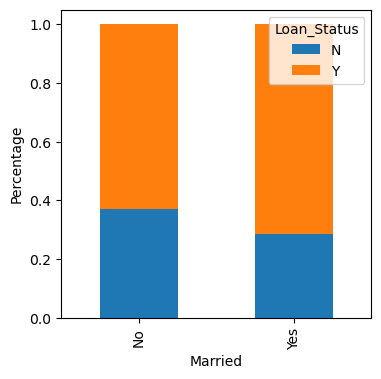

In [157]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


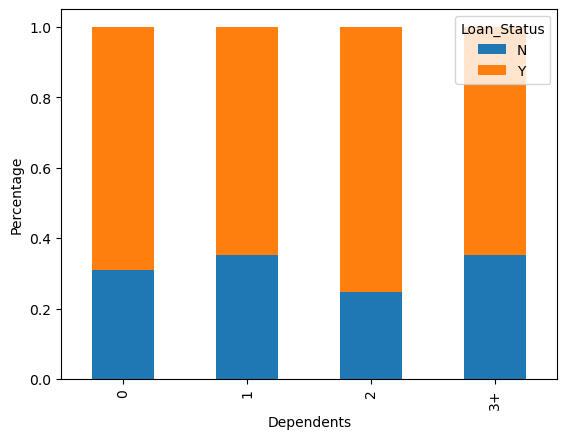

In [158]:

# Ailede Bakmakla Yükümlü Kişiler
print(pd.crosstab(df['Dependents'],df['Loan_Status']))

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


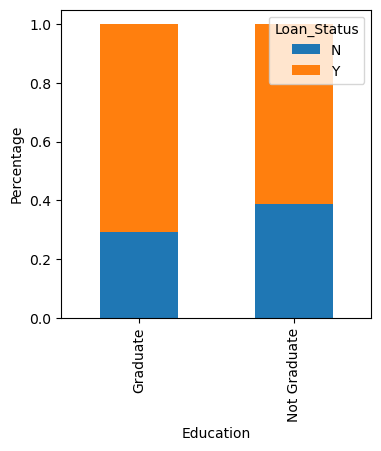

In [159]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


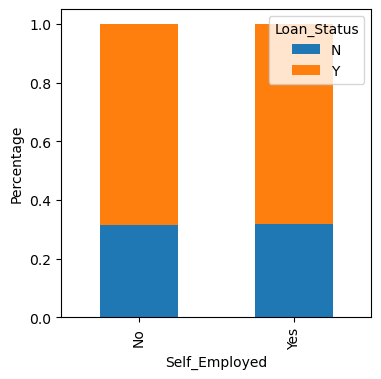

In [160]:
# Self_Employed yani freelancer, girisimci vs.

print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


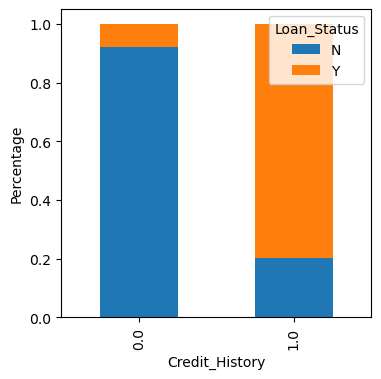

In [161]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


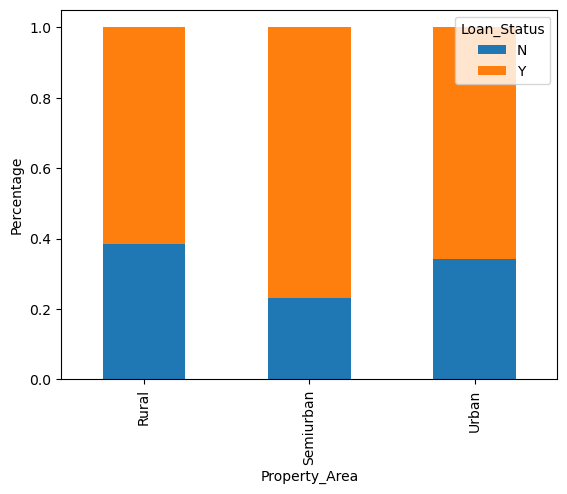

In [162]:
# Property_Area yani mulkun bulundugu yer mesela kirsal, kentsel bolge vs

print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [117]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,592.000000
mean,0.838762,0.657980,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296,7024.705081,4.857444
std,0.421752,0.484971,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973,6458.663872,0.505142
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,1442.000000,2.197225
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,4166.000000,4.605170
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000,5416.500000,4.852030
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000,7521.750000,5.123964
max,2.000000,2.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000,81000.000000,6.551080


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  TotalIncome        614 non-null    float64
 14  LoanAmount_log     592 non-null    float64
dtypes: float64(6), int64(7), object(2)
memory usage: 72.1+ KB


In [119]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
LoanAmount_log       22
dtype: int64

In [122]:
# Tüm NaN (eksik) değerleri ilgili değişkenin moduyla (en sık tekrar eden değeri) dolduruyoruz.
# Bu işlem, eksik verilerin en yaygın kategoriyle doldurulması anlamına gelir.

df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)  # 'Gender' sütunundaki eksik değerler, en sık görülen cinsiyet ile dolduruluyor.
df["Married"].fillna(df["Married"].mode()[0], inplace=True)  # 'Married' sütunundaki eksik değerler, en sık görülen evlilik durumu ile dolduruluyor.
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)  # 'Self_Employed' sütunundaki eksik değerler, en yaygın çalışma durumu ile dolduruluyor.
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)  # 'Loan_Amount_Term' sütunundaki eksik değerler, en sık görülen kredi süresi ile dolduruluyor.
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)  # 'Dependents' sütunundaki eksik değerler, en yaygın bağımlı sayısı ile dolduruluyor.
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)  # 'Credit_History' sütunundaki eksik değerler, en sık tekrar eden kredi geçmişi değeri ile dolduruluyor.

# "Dependents" sütunundaki tüm değerler "str" formundaydı, şimdi "int" (tamsayı) formuna dönüştürüyoruz.
df["Dependents"] = df["Dependents"].replace('3+', int(3))  # '3+' olarak belirtilen bağımlı sayısını 3 tamsayısına dönüştürüyor.
df["Dependents"] = df["Dependents"].replace('1', int(1))   # '1' olan bağımlı sayısını 1 tamsayısına dönüştürüyor.
df["Dependents"] = df["Dependents"].replace('2', int(2))   # '2' olan bağımlı sayısını 2 tamsayısına dönüştürüyor.
df["Dependents"] = df["Dependents"].replace('0', int(0))   # '0' olan bağımlı sayısını 0 tamsayısına dönüştürüyor.

# 'LoanAmount' sütunundaki eksik değerleri medyan ile dolduruyoruz.
# Medyan, veri setinin ortanca değeridir ve uç değerlerin etkisini en aza indirmek için kullanılır.
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)

# Veri çerçevesindeki eksik değerlerin sayısını sütun bazında yazdırır.
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [123]:
print(df["Gender"].value_counts())
print(df["Married"].value_counts())
print(df["Self_Employed"].value_counts())
print(df["Dependents"].value_counts())
print(df["Credit_History"].value_counts())
print(df["Loan_Amount_Term"].value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


In [124]:
# 'LabelEncoder' (le) kullanılarak kategorik değişkenler sayısal değerlere dönüştürülüyor.
# Label Encoding, kategorik verilerin her bir kategorisine benzersiz bir sayı atanması işlemidir.

df["Gender"] = le.fit_transform(df["Gender"])  # 'Gender' sütunundaki kategorik değerler (örneğin, 'Male' ve 'Female'), sayısal değerlere dönüştürülüyor (örneğin, 0 ve 1).
df["Married"] = le.fit_transform(df["Married"])  # 'Married' sütunundaki evlilik durumu kategorik değerleri sayısal değerlere dönüştürülüyor.
df["Education"] = le.fit_transform(df["Education"])  # 'Education' sütunundaki eğitim durumu kategorik değerleri sayısal değerlere dönüştürülüyor.
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])  # 'Self_Employed' sütunundaki serbest çalışan durumu kategorik değerleri sayısal değerlere dönüştürülüyor.
df["Property_Area"] = le.fit_transform(df["Property_Area"])  # 'Property_Area' sütunundaki mülk alanı kategorik değerleri sayısal değerlere dönüştürülüyor.
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])  # 'Loan_Status' sütunundaki kredi durumu kategorik değerleri sayısal değerlere dönüştürülüyor.

# Kategorik verilerin "one-hot encoding" yöntemiyle dönüştürülmesi için kullanılan bir fonksiyon (şu an yorum satırı yapılmış durumda).
# Bu satır, veri setini sütunlara ayırarak her kategoriyi ayrı bir sütun haline getirir.

df.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [125]:
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)  
# Özellikler (bağımsız değişkenler) için 'Loan_Status' ve 'Loan_ID' dışındaki sütunları seçiyoruz.
y = df["Loan_Status"]  
# Hedef değişken (bağımlı değişken) olarak 'Loan_Status'u seçiyoruz.


In [126]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [127]:
model=LogisticRegression(solver="liblinear")

model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [128]:
model.score(X_train,y_train)


0.8018648018648019

In [129]:
model.score(X_test,y_test)


0.8324324324324325

In [130]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [131]:
dtree.score(X_train,y_train)


1.0

In [132]:
dtree.score(X_test,y_test)


0.7351351351351352

In [133]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))

0.8181818181818182


In [134]:
y_predict = dTreeR.predict(X_test)
print(dTreeR.score(X_test, y_test))

0.8108108108108109


In [136]:
from sklearn.ensemble import BaggingClassifier

# BaggingClassifier oluşturuluyor.
# n_estimators: 150, modelin oluşturacağı temel ağaç sayısını belirtir.
# base_estimator: Kullanılan temel sınıflandırıcı (örneğin, karar ağaçları).
# random_state: Sonuçların tekrarlanabilirliğini sağlamak için rastgele durum.
bgcl = BaggingClassifier(n_estimators=150, base_estimator=dTreeR, random_state=0)

# Model, eğitim verileri (X_train ve y_train) ile eğitiliyor.
bgcl = bgcl.fit(X_train, y_train)

# Test verileri (X_test) kullanılarak tahmin yapılıyor.
y_predict = bgcl.predict(X_test)

# Modelin test verisi üzerindeki doğruluğu (accuracy) yazdırılıyor.
print(bgcl.score(X_test, y_test))

0.827027027027027


In [138]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120,random_state=0)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

0.8216216216216217


In [139]:

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.8108108108108109


In [141]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160, random_state=0,max_features=3)
rfcl = rfcl.fit(X_train, y_train)

AdaBoost ve Gradient Boosting, ardışık modelleme ile güçlü sınıflandırıcılar oluştururken tercih edilir.
Random Forest ve Bagging, bağımsız ağaçlar kullanarak genel performansı artırırken, aşırı uyumu azaltır.
Veri setinin özelliklerine, boyutuna ve aşırı uyum riskine bağlı olarak hangi sınıflandırıcının seçileceği değişir. Genelde, problem ve veri setine göre denemeler yaparak en iyi performansı veren model seçilmelidir.